#PCA from scratch



In [47]:
from sklearn.datasets import load_iris
import numpy as np

In [48]:
data = load_iris()  # fucntion to load the iris dataset

In [49]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [50]:
X = data['data']  # Feature set
y = data['target']  # target variable
print(data['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [51]:
X[:5]   # print the 1st 5 rows of X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [52]:
X.ndim   # 2D numpy array

2

In [53]:
X.shape  # 150 records or samples, and 4 features/attributes

(150, 4)

In [54]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [55]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [56]:
y[:5], y[51:55], y[101:105]

(array([0, 0, 0, 0, 0]), array([1, 1, 1, 1]), array([2, 2, 2, 2]))

In [57]:
# Step 1: Standardise the data
from sklearn.preprocessing import StandardScaler

In [58]:
X.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [59]:
X.std(axis=0)

array([0.82530129, 0.43441097, 1.75940407, 0.75969263])

In [60]:
SC = StandardScaler()  # create instance of the Stnadardsclaer class
X_std = SC.fit_transform(X)
X_std.shape

# X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

(150, 4)

In [61]:
print(X_std[:5])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [62]:
# Step 2: Find the coaviance matrix
cov_mat = np.cov(X_std.T)
cov_mat.shape

(4, 4)

In [63]:
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [64]:
# Step 3: find the eig values and eig vectors of this cov matrix
eig_val, eig_vect = np.linalg.eig(cov_mat)

In [65]:
eig_val

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [66]:
explained_variance_ratio = eig_val/sum(eig_val)
explained_variance_ratio

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [67]:
np.cumsum(explained_variance_ratio)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

In [68]:
eig_vect

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [69]:
eig_vect[0,:]  # extract the 1st eig vect

array([ 0.52106591, -0.37741762, -0.71956635,  0.26128628])

In [70]:
PC1 = eig_vect[0,:]

In [71]:
# Step 4: Construct the transformer matrix (W)
W = PC1.T
W = W.reshape(-1, 1)
W

array([[ 0.52106591],
       [-0.37741762],
       [-0.71956635],
       [ 0.26128628]])

In [72]:
W

array([[ 0.52106591],
       [-0.37741762],
       [-0.71956635],
       [ 0.26128628]])

In [73]:
# Selecting the top 2 principal components
W = np.hstack([eig_vect[0,:].reshape(-1,1), eig_vect[1,:].reshape(-1,1)  ])
W

array([[ 0.52106591, -0.26934744],
       [-0.37741762, -0.92329566],
       [-0.71956635,  0.24438178],
       [ 0.26128628, -0.12350962]])

In [74]:
# Step 5: Transformation step / Projection step
X_pca = X_std.dot(W)
X_pca.shape

(150, 2)

In [75]:
X_pca[:5]

array([[-0.23323008, -0.86330304],
       [ 0.0748986 ,  0.26466784],
       [-0.18423663, -0.10902903],
       [-0.24228936,  0.16392697],
       [-0.38324685, -1.04320646]])

In [76]:
tot = sum(eig_val)
var_exp = [(i / tot) for i in sorted(eig_val, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

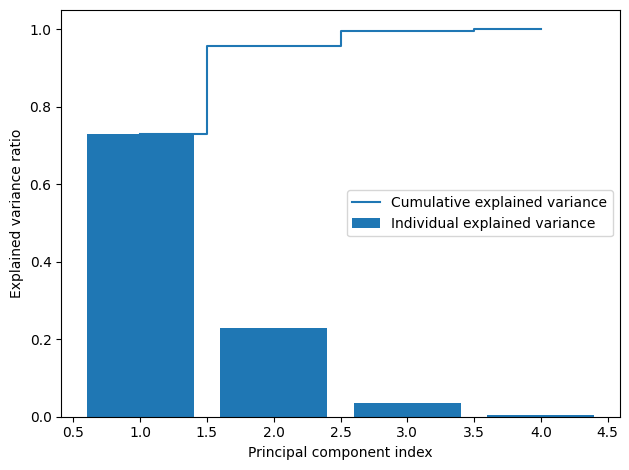

In [77]:
import matplotlib.pyplot as plt

plt.bar(range(1, X.shape[1]+1), var_exp, align='center',
        label='Individual explained variance')
plt.step(range(1, X.shape[1]+1), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('figures/05_02.png', dpi=300)
plt.show()

# PCA using sklearn

In [78]:
from sklearn.decomposition import PCA

In [79]:
# Initialize PCA and reduce the dimensionality
pca = PCA(n_components=2)
pca.fit(X_std)  # preparing the transformerr matrix

PCA(n_components=2)

In [80]:
X_pca = pca.transform(X_std)
X_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [81]:
X_pca = pca.fit_transform(X_std)  # fit & transform in the same step

In [82]:
# you can also retrieve the amount of variance explained by each component
print("Explained variance ratio:")
print(pca.explained_variance_ratio_)

Explained variance ratio:
[0.72962445 0.22850762]
